<a href="https://colab.research.google.com/github/MaxiPerrone/machine-learning/blob/main/2_Division_conjunto_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import kagglehub
import os

In [2]:
dataset_path = kagglehub.dataset_download("dhanushnarayananr/credit-card-fraud")
csv_file = os.path.join(dataset_path, "card_transdata.csv")

Using Colab cache for faster access to the 'credit-card-fraud' dataset.
Using Colab cache for faster access to the 'credit-card-fraud' dataset.


In [33]:
df_orig = pd.read_csv(csv_file);
df = df_orig.copy()
print(df.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  


In [34]:
df.shape

(1000000, 8)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [36]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)

In [37]:
print(len(train_set))
print(len(test_set))

600000
400000


In [38]:
test_set, val_set = train_test_split(test_set, test_size=0.5, random_state=42)

In [39]:
print("Training set length: ", len(train_set))
print("Testing set length: ", len(test_set))
print("Validation set length: ", len(val_set))

Training set length:  600000
Testing set length:  200000
Validation set length:  200000


In [40]:
import numpy as np

df['card_type'] = np.random.choice(['debit', 'credit', 'prepaid'], size=len(df), p=[0.7, 0.2, 0.1])

In [41]:
df['card_type'].value_counts()

,count
card_type,
debit,699966
credit,199844
prepaid,100190


In [42]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
  strat = df[stratify] if stratify else None
  train_set, test_set = train_test_split(
    df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
  strat = test_set[stratify] if stratify else None
  val_set, test_set = train_test_split(
    test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
  return (train_set, val_set, test_set)

In [43]:
train_set, val_set, test_set = train_val_test_split(df, stratify='card_type')

In [44]:
print("Training set length: ", len(train_set))
print("Testing set length: ", len(test_set))
print("Validation set length: ", len(val_set))

Training set length:  600000
Testing set length:  200000
Validation set length:  200000


<Axes: >

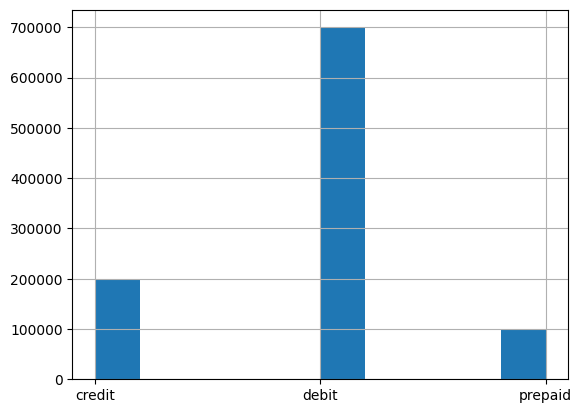

In [47]:
df['card_type'].hist()

<Axes: >

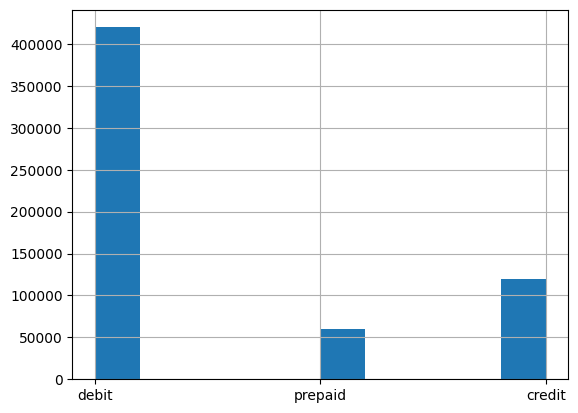

In [48]:
train_set['card_type'].hist()

<Axes: >

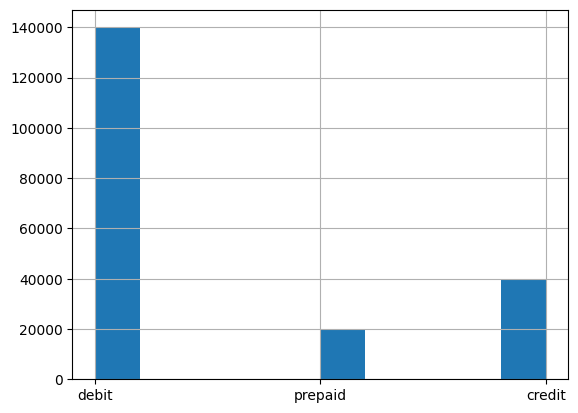

In [49]:
test_set['card_type'].hist()

<Axes: >

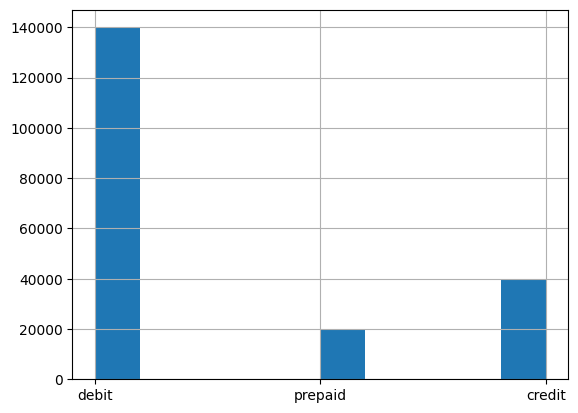

In [50]:
val_set['card_type'].hist()